# Este notebook foi desenvolvido para construir as figuras que serão utilizadas no abstract a ser enviado para o Congresso Geológico Chileno (2018).

## A primeira parte consiste nas imagens referentes ao dado sintético. A segunda parte será referente ao conjunto de dados reais referentes à anomalia magnética da Serra do Cabral (Minas Gerais, Brasil).

# Informações do trabalho:
### Título: Determination of the magnetization direction by cross-correlation: application in the Serra do Cabral magnetic anomaly
### Autores: Nelson de Lima Ribeiro Filho, Rodrigo Bijani Santos & Cosme Ferreira da Ponte Neto.

# (1) Utilização de dados sintéticos

In [1]:
# Bibliotecas necessarias
import numpy as np
import matplotlib.pyplot as plt
from codes.prism import prism_tf

In [2]:
# Posicoes e numero de pontos
n = 100
x = np.linspace(-2500, 2500, n)
y = np.copy(x)
z = -100. #np.random.normal(loc = -100., scale = 5., size=n)
# Cria o grid regular
X, Y = np.meshgrid(x, y)

In [3]:
# Descricao do modelo
modelo = [-400., 400., -400., 400., 100., 900., 0.5]
area = (modelo[:4])

#Valores de incliacao e declinacao do campo e da fonte
campo = [55., 42.]
fonte = [25., 68.]

In [4]:
from codes.statistical import analysis
from codes.auxiliars import addnoise

In [5]:
# Calculo da anomalia magnetica
tfa = prism_tf(X, Y, z, modelo, fonte, campo)

In [6]:
# Analise da anomalia
_ = analysis(tfa, 'nT')

Minimum:    -65.4885 nT
Maximum:    104.0863 nT
Mean value: 0.2362 nT
Variation:  169.5748 nT


In [7]:
# Adicao de 5 nT de ruido com 5%
tfa_noise = addnoise(tfa, 3., 0.1)

In [8]:
# Analise do dado com ruido
_ = analysis(tfa_noise, 'nT')

Minimum:    -62.5142 nT
Maximum:    107.3049 nT
Mean value: 3.2361 nT
Variation:  169.8192 nT


In [25]:
# Escreve valores maximos e minimos para a escala de cor
vmin = tfa_noise.min()
vmax = tfa_noise.max()

In [9]:
from codes.plot import draw_prism, prism3D

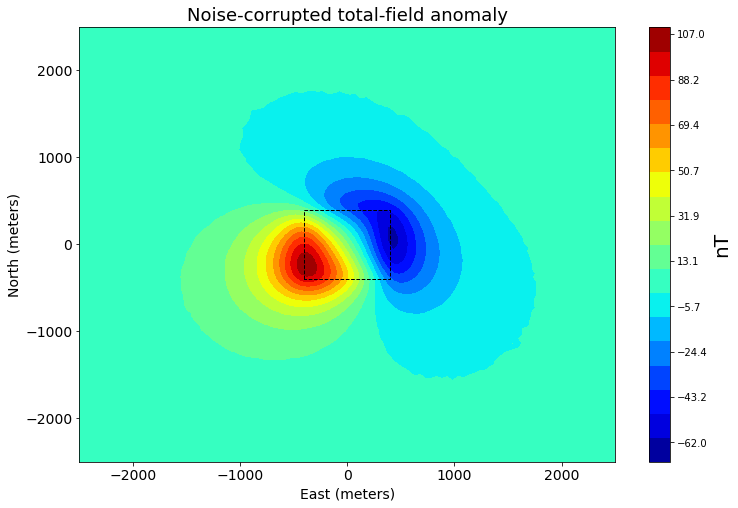

In [60]:
# Ploting all results 
plt.close('all')
plt.figure(1, figsize=(12, 8))
plt.contourf(Y, X, tfa_noise, 20, cmap = plt.cm.jet)
draw_prism(area, linewidth=1)
plt.title('Noise-corrupted total-field anomaly', fontsize = 18)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
cb = plt.colorbar()
cb.set_ticks(np.linspace(int(vmin), int(vmax), 10))
cb.set_label('nT', fontsize = 20)

plt.savefig('figs/figure1-anomaly.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [35]:
# Importando o pacote para construcao de modelo 3D
from mpl_toolkits.mplot3d import Axes3D

In [36]:
# Funcao para construcao do modelo 3D
def model3D(x_range, y_range, z_range, sf = 2.):
    
    'It plots a rectangular 3D model as a wareframe surface.'
    
    z_range = -z_range
    
    xx, yy = np.meshgrid(x_range, y_range)
    ax.plot_wireframe(xx, yy, z_range[0], color="k", alpha = 0.5)
    ax.plot_surface(xx, yy, z_range[0], color="b", alpha = 0.75)
    ax.plot_wireframe(xx, yy, z_range[1], color="k", alpha = 0.5)
    ax.plot_surface(xx, yy, z_range[1], color="b", alpha = 0.75)

    yy, zz = np.meshgrid(y_range, z_range)
    ax.plot_wireframe(x_range[0], yy, zz, color="k", alpha = 0.5)
    ax.plot_surface(x_range[0], yy, zz, color="b", alpha = 0.75)
    ax.plot_wireframe(x_range[1], yy, zz, color="k", alpha = 0.5)
    ax.plot_surface(x_range[1], yy, zz, color="b", alpha = 0.75)

    xx, zz = np.meshgrid(x_range, z_range)
    ax.plot_wireframe(xx, y_range[0], zz, color="k", alpha = 0.5)
    ax.plot_surface(xx, y_range[0], zz, color="b", alpha = 0.75)
    ax.plot_wireframe(xx, y_range[1], zz, color="k", alpha = 0.5)
    ax.plot_surface(xx, y_range[1], zz, color="b", alpha = 0.75)
    
    ax.set_xlim3d(sf*xx.min(), sf*xx.max())
    ax.set_ylim3d(sf*yy.min(), sf*yy.max())
    ax.set_zlim3d(sf*zz.min(), 0.)
    
    ax.set_xticks(np.arange(sf*x_range.min(), sf*x_range.max(), 600))
    ax.set_yticks(np.arange(sf*y_range.min(), sf*y_range.max(), 600))
    ax.set_zticks(np.arange(sf*z_range.min(), sf*z_range.max(), 900))
    
    ax.set_xlabel('X (meters)', labelpad = 15)
    ax.set_ylabel('Y (meters)', labelpad = 15)
    ax.set_zlabel('Depth (meters)', labelpad = 15)

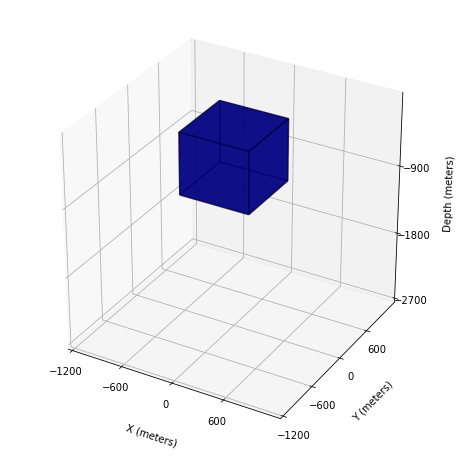

In [46]:
# Cria a figura do modelo em versao 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection = '3d')
ax.set_aspect("equal")
model3D(np.array([-400, 400]), np.array([-400, 400]), np.array([100, 900]), 3.)

plt.savefig('figs/figure2-model3d.png', dpi=300, facecolor='w', 
            edgecolor='w', bbox_inches='tight', pad_inches=0.25)
plt.show()

In [48]:
# Importa a funcao de correlacao
from codes.statistical import cccoef

In [49]:
# Intervalos de inclinacao e declinacao
inc_pos = np.arange(10, 91, 1)
inc_neg = np.arange(-90,-9, 1)
dec = np.arange(-180., 181., 1.)

# Para rodar em meu computador
#inc_pos = np.linspace(10., 91., 181)
#inc_neg = np.linspace(-90., -9., 181)
#dec = np.linspace(-180., 180., 721.)

# Criacao do grid
Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos)
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg)

In [50]:
# Cria o vetor/matriz de resultado
ni, nd = inc_pos.size, dec.size
res_pos = np.zeros([ni, nd])
res_neg = np.zeros([ni, nd])

In [51]:
# Importa os filtros para calculo
from codes.filtering import reduction
from codes.derivative import totalgrad, zderiv

In [52]:
# Calculo para intervalo positivo
for j in range(nd):
    for i in range(ni):    
        rtp_pos = reduction(x, y, tfa_noise, campo, (inc_pos[i], dec[j]))
        tga_pos = totalgrad(x, y, rtp_pos)
        vga_pos = zderiv(x, y, rtp_pos)
        res_pos[i,j] = cccoef(tga_pos, vga_pos)

codes/auxiliars.py:190: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


In [53]:
# Calculo para intervalo negativo
for j in range(nd):
    for i in range(ni):    
        rtp_neg = reduction(x, y, tfa_noise, campo, (inc_neg[i], dec[j]))
        tga_neg = totalgrad(x, y, rtp_neg)
        vga_neg = zderiv(x, y, rtp_neg)
        res_neg[i,j] = cccoef(tga_neg, vga_neg)

In [55]:
# Analise dos valores de correlacao
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    0.0877
Maximum:    0.7360
Mean value: 0.4122
Variation:  0.6483

Correlacao (inclinacao negativa)
Minimum:    -0.7360
Maximum:    -0.0877
Mean value: -0.4125
Variation:  0.6483


In [56]:
# Busca do par de inclinacao e declinacao positivos
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 25.0
Declination: 68.0

Minima correlacao:
Inclination: 10.0
Declination: -171.0


In [57]:
# Busca do par de inclinacao e declinacao negativos
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: 9.0

Minima correlacao:
Inclination: -25.0
Declination: -112.0


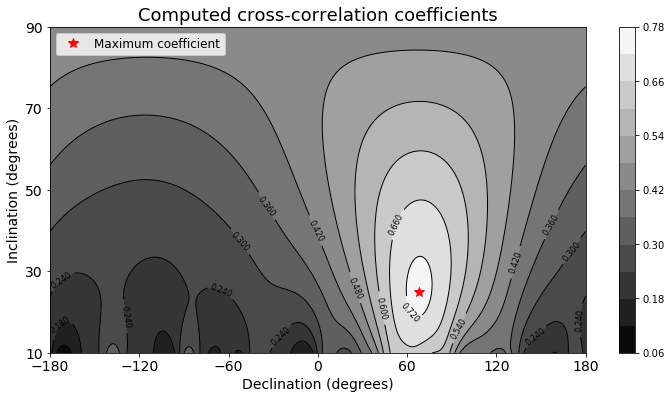

In [80]:
# Plotando o mapa de correlacao
plt.figure(figsize=(12, 6))

plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Maximum coefficient')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 18)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
#plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
#plt.plot(dec_neg_max, inc_neg_max, 'ro', markersize = 8, label = '(I, D) max coef')
#plt.plot(dec_neg_min, inc_neg_min, 'b*', markersize = 12, label = 'Coeficiente minimo')
#plt.clabel(plot2, fontsize = 8)
#plt.rcParams['contour.negative_linestyle'] = 'solid'
#plt.title('Mapa de correlacao (intervalo negativo de inclinacao)', fontsize = 14)
#plt.xlabel('Declinacao (graus)', fontsize = 14)
#plt.ylabel('Inclinacao (graus)', fontsize = 14)
#plt.colorbar()
#plt.legend(loc = 'lower right')

plt.savefig('figs/figure3-correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

# (2) Utilização de dados reais

In [72]:
# Importando os comandos necessarios
import matplotlib as mpl
from scipy.interpolate import griddata
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection

In [73]:
# Define as coordenadas do Brasil para o mapa de localizacao
bra_west = -70#-50.
bra_east = -30.#-40.
bra_north = 0.#-15. 
bra_south = -30.#-20.
bra_lat0 = 0.5*(bra_north + bra_south)
bra_lon0 = 0.5*(bra_west + bra_east)
# Area
brazilarea = [bra_west, bra_east, bra_north, bra_south]

In [75]:
# Cria o basemap
locmap = Basemap(resolution='f',projection='cyl',
                 llcrnrlon=bra_west, llcrnrlat=bra_south,
                 urcrnrlon=bra_east, urcrnrlat=bra_north)

In [76]:
# Define paralelos e meridianos
parallels = np.arange(-90., 91, 5.)
meridians = np.arange(0., 361., 10.)

In [77]:
# Carrega o dado para definir a area de estudo
x, y, lon, lat, z = np.loadtxt('cabral.dat', skiprows = 1, usecols = (0,1,2,3,4), unpack=True)

In [78]:
# Define as coordenadas e area
longmin = lon.min()
longmax = lon.max()
latmin = lat.min()
latmax = lat.max()
long0 = 0.5*(longmax + longmin)
lat0 = 0.5*(latmax + latmin)
# Area
area = [longmin, longmax, latmin, latmax]

In [79]:
# Cria um poligono para adicao ao Basemap
patches = []
myarea = np.array([[longmin - 0.5, latmax], [longmax + 0.5, latmax], 
                   [longmax + 0.5, latmin], [longmin - 0.5, latmin]])
patches.append(Polygon(myarea))

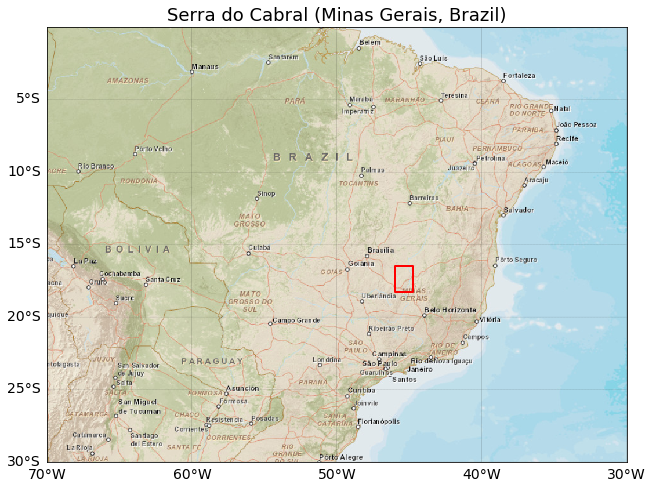

In [83]:
# Cria a figura de localizacao
figure = plt.figure(figsize=(12, 8))
ax = figure.add_subplot(111)

figure = locmap.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels=1000, dpi=100, verbose=False)
figure = locmap.drawparallels(parallels, labels=[1,0,0,0], linewidth = 0.15, fontsize = 14)
figure = locmap.drawmeridians(meridians, labels=[0,0,0,1], linewidth = 0.25, fontsize = 14)
ax.add_collection(PatchCollection(patches, edgecolor='r', facecolor ='None', linewidths = 2))
ax.set_title('Serra do Cabral (Minas Gerais, Brazil)', fontsize = 18)

plt.savefig('figs/figure4-location.png', dpi = 600, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [84]:
# Analise do dado original
print 'Dado magnetico original:'
_ = analysis(z, 'nT')

Dado magnetico original:
Minimum:    -172.9280 nT
Maximum:    317.3630 nT
Mean value: 10.0603 nT
Variation:  490.2910 nT


In [85]:
# Nova area e novo shape para o dado
area_utm = [x.min(), x.max(), y.min(), y.max()]
shape = (50, 50)

In [86]:
# Interpolando o dado em coordeandas metricas
xi = np.linspace(x.min(), x.max(), 50)
yi = np.linspace(y.min(), y.max(), 50)
xnew, ynew = np.meshgrid(xi, yi)

# Interpolando o dado em coordenadas geograficas
#lon_i = np.linspace(longmin, longmax, 50)
#lat_i = np.linspace(latmin, latmax, 50)
#longnew, latnew = np.meshgrid(lon_i, lat_i)

In [97]:
print x.min(), xi.min(), xnew.min()
print y.min(), yi.min(), ynew.min()

-80000.0 -80000.0 -80000.0
-100000.0 -100000.0 -100000.0


In [98]:
print x.max(), xi.max(), xnew.max()
print y.max(), yi.max(), ynew.max()

100000.0 100000.0 100000.0
150000.0 150000.0 150000.0


In [87]:
# Uso do grid data para o dado UTM
znew = griddata((x, y), z, (xnew, ynew), 'cubic')

In [88]:
# Estatistica do dado
print 'Dado magnetico gridado:'
_ = analysis(znew, 'nT')

Dado magnetico gridado:
Minimum:    -173.0437 nT
Maximum:    320.2614 nT
Mean value: 10.1921 nT
Variation:  493.3051 nT


In [89]:
# Define valores de maximo e minimo para escala de cor
vminimo = znew.min()
vmaximo = znew.max()

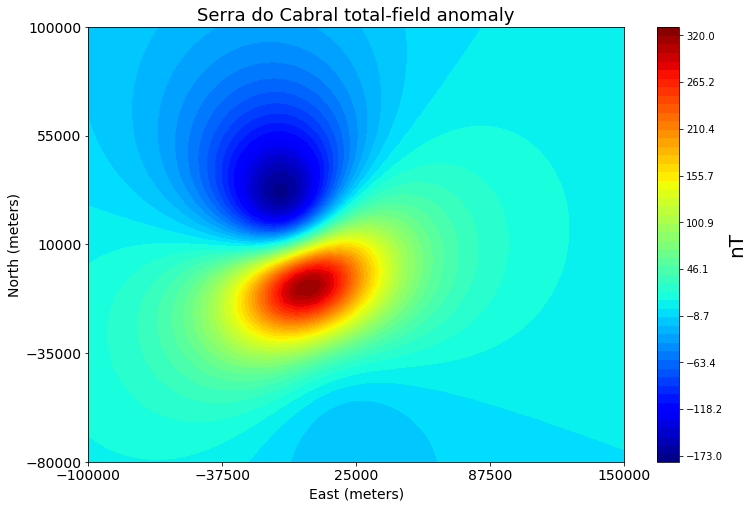

In [101]:
# Imprime o dado magnetico real
plt.close('all')
plt.figure(figsize=(12,8))
plt.contourf(ynew, xnew, znew, 50, cmap = plt.cm.jet)
plt.title('Serra do Cabral total-field anomaly', fontsize = 18)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(y.min(), y.max(), 5), fontsize = 14)
plt.yticks(np.linspace(x.min(), x.max(), 5), fontsize = 14)
cb = plt.colorbar()
cb.set_ticks(np.linspace(int(vminimo), int(vmaximo), 10))
cb.set_label('nT', fontsize = 20)

plt.savefig('figs/figure5-realdata.png', dpi = 600, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [102]:
# Importa as funcoes de filtragem
from codes.filtering import reduction
from codes.derivative import totalgrad, zderiv

In [103]:
# Define a direcao do campo (Ponte-Neto, 2008)
field = (-17., -17.5)

In [104]:
# Define os vetores de inclinacao e declinacao
inc_pos = np.arange(10, 91, 1)
inc_neg = np.arange(-90,-9, 1)
dec = np.arange(-180., 180., 1)

# Para rodar em meu computador
#inc_pos = np.linspace(10., 91., 181)
#inc_neg = np.linspace(-90., -9., 181)
#dec = np.linspace(-180., 180., 721.)

# Define o tamnho dos vetores de inclinacao e declinacao
ni, nd = inc_pos.size, dec.size

In [105]:
# Computa o grid de Inc x Dec
Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos)
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg)

# Cria as matrizes nulas para computar o resultado
res_pos = np.zeros([ni, nd])
res_neg = np.zeros([ni, nd])

In [106]:
# Calculo da correlacao para os intervalos positivos
for j in range(nd):
    for i in range(ni):    
        rtp_pos = reduction(xnew, ynew, znew, field, (inc_pos[i], dec[j]))
        tga_pos = totalgrad(xnew, ynew, rtp_pos)
        vga_pos = zderiv(xnew, ynew, rtp_pos)
        res_pos[i,j] = cccoef(tga_pos, vga_pos)

In [107]:
# Calculo da correlacao para os intervalos negativos
for j in range(nd):
    for i in range(ni):    
        rtp_neg = reduction(xnew, ynew, znew, field, (inc_neg[i], dec[j]))
        tga_neg = totalgrad(xnew, ynew, rtp_neg)
        vga_neg = zderiv(xnew, ynew, rtp_neg)
        res_neg[i,j] = cccoef(tga_neg, vga_neg)

In [108]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    -0.0827
Maximum:    0.7980
Mean value: 0.3655
Variation:  0.8807

Correlacao (inclinacao negativa)
Minimum:    -0.7980
Maximum:    0.0827
Mean value: -0.3655
Variation:  0.8807


In [109]:
# Busca os indices de maximo e minino e a direcao encontrada para intervalo positivo
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = Inc_pos[imax_pos, jmax_pos]
dec_pos_max = Dec_pos[imax_pos, jmax_pos]

inc_pos_min = Inc_pos[imin_pos, jmin_pos]
dec_pos_min = Dec_pos[imin_pos, jmin_pos]
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: [19]
Declination: [ 159.]

Minima correlacao:
Inclination: [10]
Declination: [-13.]


In [110]:
# Busca os indices de maximo e minino e a direcao encontrada para intervalo negativo
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = Inc_neg[imax_neg, jmax_neg]
dec_neg_max = Dec_neg[imax_neg, jmax_neg]

inc_neg_min = Inc_neg[imin_neg, jmin_neg]
dec_neg_min = Dec_neg[imin_neg, jmin_neg]
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: [-10]
Declination: [ 167.]

Minima correlacao:
Inclination: [-19]
Declination: [-21.]


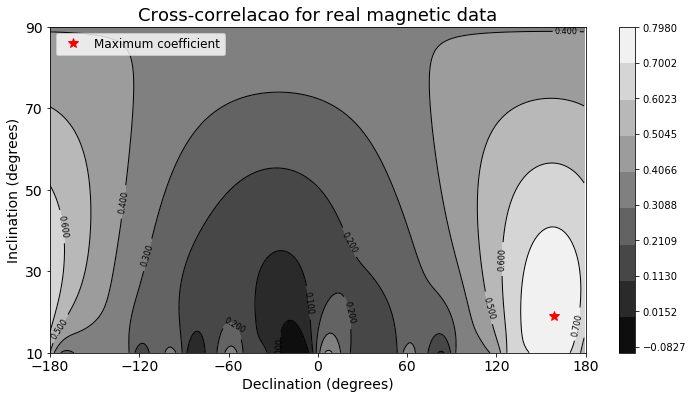

In [112]:
# Plotting the first result
plt.close('all')
plt.figure(figsize=(12, 6))

plot2 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Maximum coefficient')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Cross-correlacao for real magnetic data', fontsize = 18)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
cb.set_ticks(np.linspace(res_pos.min(), res_pos.max(), 10))
plt.legend(loc = 'upper left', fontsize = 'large')

plt.savefig('figs/figure6-real-correlation.png', dpi = 600, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [114]:
# Registrando o notebook
import time

In [130]:
print 'Nelson Ribeiro Filho', '/', 'Rio de Janeiro -', time.ctime()

Nelson Ribeiro Filho / Rio de Janeiro - Wed May  2 13:16:54 2018
